# Exploratory Analysis

In [9]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np 
import os
from pathlib import Path
import inspect
import sys
import pandas as pd

In [2]:
class MLP(nn.Module):
    def __init__(self, *args) -> None:
        super().__init__()

        input_dim = 28 * 28
        hidden_dim = 256
        output_dim = 10
        num_hidden_layers = 2

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        layers = []
        dim = input_dim

        for _ in range(num_hidden_layers):
            layers.append(nn.Linear(dim, self.hidden_dim))
            layers.append(nn.ReLU())
            dim = self.hidden_dim

        layers.append(nn.Linear(self.hidden_dim, self.output_dim))

        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [3]:
RESULTS_DIR = "../results/"
OPTIMIZERS = ["adamw", "adam", "muon", "muon10p", "10p", "spectralnorm", "muonspectralnorm"]

In [4]:
example_results_dir = os.listdir(RESULTS_DIR + OPTIMIZERS[0])
print(example_results_dir) 

['adamw_projections.pt', 'gradients', 'pretrain_weights', 'loss_landscape', 'trajectory_summaries', 'evaluation_results', 'penultimate_activations', 'swag_moments']


## Model

In [5]:
weights = torch.load(RESULTS_DIR + OPTIMIZERS[0] + "/pretrain_weights/particle0_epoch30_weights.pt", weights_only=False)
model = MLP()
model.load_state_dict(weights)
for name, param in model.named_parameters():
    print(name, param.shape)

net.0.weight torch.Size([256, 784])
net.0.bias torch.Size([256])
net.2.weight torch.Size([256, 256])
net.2.bias torch.Size([256])
net.4.weight torch.Size([10, 256])
net.4.bias torch.Size([10])


## Trajectory Summaries

In [6]:
print(os.listdir(RESULTS_DIR + OPTIMIZERS[0] + "/trajectory_summaries"))

['trajectory_summaries.pt']


In [11]:
def print_traj_sums():
    traj_sums = {}
    for opt in OPTIMIZERS: 
        traj_sum = torch.load(RESULTS_DIR + OPTIMIZERS[0] + "/trajectory_summaries/trajectory_summaries.pt", weights_only=False)['particle_0_pretrain']
        traj_sums[opt] = traj_sum
    traj_sums = pd.DataFrame(traj_sums)
    display(traj_sums)
print_traj_sums()

,adamw,adam,muon,muon10p,10p,spectralnorm,muonspectralnorm
total_path_length,772.058472,772.058472,772.058472,772.058472,772.058472,772.058472,772.058472
mean_step_size,25.735283,25.735283,25.735283,25.735283,25.735283,25.735283,25.735283
step_size_variance,19.530861,19.530861,19.530861,19.530861,19.530861,19.530861,19.530861
trajectory_endpoints_distance,190.454895,190.454895,190.454895,190.454895,190.454895,190.454895,190.454895


## Epoch Metrics

In [12]:
print(os.listdir(RESULTS_DIR + OPTIMIZERS[0] + "/evaluation_results"))

['swag_epoch20_loss.pt', 'pretrain_epoch20_metrics.pt', 'swag_epoch15_loss.pt', 'swag_epoch15_metrics.pt', 'swag_epoch2_metrics.pt', 'pretrain_epoch5_loss.pt', 'pretrain_epoch23_loss.pt', 'pretrain_epoch18_metrics.pt', 'pretrain_epoch18_loss.pt', 'pretrain_epoch8_loss.pt', 'swag_epoch11_loss.pt', 'pretrain_epoch13_loss.pt', 'swag_epoch5_loss.pt', 'pretrain_epoch22_loss.pt', 'pretrain_epoch13_metrics.pt', 'swag_epoch17_loss.pt', 'pretrain_epoch19_loss.pt', 'pretrain_epoch6_loss.pt', 'swag_epoch9_metrics.pt', 'swag_epoch9_loss.pt', 'pretrain_epoch12_metrics.pt', 'swag_epoch16_metrics.pt', 'pretrain_epoch16_loss.pt', 'pretrain_epoch15_loss.pt', 'pretrain_epoch30_metrics.pt', 'swag_epoch8_loss.pt', 'pretrain_epoch29_metrics.pt', 'swag_epoch12_loss.pt', 'swag_epoch18_metrics.pt', 'swag_epoch19_metrics.pt', 'swag_epoch2_loss.pt', 'swag_epoch6_loss.pt', 'pretrain_epoch7_loss.pt', 'pretrain_epoch15_metrics.pt', 'pretrain_epoch22_metrics.pt', 'pretrain_epoch3_loss.pt', 'pretrain_epoch14_loss.pt

In [15]:
def print_pretrain_swag_metrics():
    pretrain_metrics = {}
    swag_metrics = {}
    for opt in OPTIMIZERS:
        pretrain_metrics[opt] = torch.load(RESULTS_DIR + opt + "/evaluation_results/pretrain_epoch1_metrics.pt", weights_only=False)
        swag_metrics[opt] = torch.load(RESULTS_DIR + opt + "/evaluation_results/swag_epoch20_metrics.pt", weights_only=False)
    pretrain_metrics = pd.DataFrame(pretrain_metrics)
    swag_metrics = pd.DataFrame(swag_metrics)
    display(pretrain_metrics)
    display(swag_metrics)

print_pretrain_swag_metrics()

,adamw,adam,muon,muon10p,10p,spectralnorm,muonspectralnorm
epoch,1,1,1,1,1,1,1
phase,pretrain,pretrain,pretrain,pretrain,pretrain,pretrain,pretrain
train_loss,0.293124,0.287504,0.307881,1.346689,0.293124,0.293124,1.926167
val_acc,0.9407,0.942,0.9679,0.8502,0.9407,0.9407,0.7022
val_corrupt_acc,0.5632,0.5861,0.5946,0.4176,0.5632,0.5632,0.3338


,adamw,adam,muon,muon10p,10p,spectralnorm,muonspectralnorm
epoch,20,20,20,20,20,20,20
phase,swag,swag,swag,swag,swag,swag,swag
train_loss,0.094351,0.067676,0.085602,0.000512,0.094351,0.094351,0.004131
val_acc,0.963,0.9604,0.9729,0.9786,0.963,0.963,0.9645
val_corrupt_acc,0.5928,0.5676,0.6426,0.6475,0.5928,0.5928,0.5129


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

def plot_val_acc_and_val_corrupt_acc_seaborn(optimizers=["adam", "adamw", "muon"], save_dir="../figures/acc/"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    print(f"Plotting {optimizers}...")
    records = []
    for opt in optimizers:
        #print(f"Processing {opt}...")
        for epoch in range(1, 31):
            path = f"{RESULTS_DIR}{opt}/evaluation_results/pretrain_epoch{epoch}_metrics.pt"
            if not os.path.exists(path):
                print(f"File {path} does not exist")
                continue
            temp = torch.load(path, weights_only=False)
            records.append({
                "epoch": epoch,
                "optimizer": opt,
                "val_acc_log": -np.log10(1 - temp["val_acc"]),
                "val_corrupt_acc": temp["val_corrupt_acc"],
                "phase": "pretrain"
            })

    df = pd.DataFrame(records)
    df["optimizer"] = pd.Categorical(df["optimizer"], categories=optimizers)


    yticks_acc = [0.7, 0.8, 0.9, 0.95, 0.98]
    yticks_log = -np.log10(1 - np.array(yticks_acc))
    ytick_labels = [f"{acc:.3f}" for acc in yticks_acc]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))


    sns.lineplot(data=df, x="epoch", y="val_acc_log", hue="optimizer", marker="o", ax=axes[0], estimator=None)
    axes[0].set_title("Validation Accuracy vs Epoch")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel(r"Validation Accuracy")
    axes[0].set_yticks(yticks_log)
    axes[0].set_yticklabels(ytick_labels)
    axes[0].grid(True)

    sns.lineplot(data=df, x="epoch", y="val_corrupt_acc", hue="optimizer", marker="o", ax=axes[1], estimator=None)
    axes[1].set_title("Validation Corrupt Accuracy vs Epoch")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Validation Corrupt Accuracy")
    axes[1].grid(True)

    legend = axes[1].get_legend()
    if legend is not None:
        legend.remove()
    #axes[1].get_legend().remove()
    axes[0].legend(title="Optimizer")

    plt.tight_layout()
    plt.savefig(f"{save_dir}/val_acc_and_val_corrupt_acc_{'_'.join(optimizers)}.png")
    #plt.show()
    plt.close("all")

plot_val_acc_and_val_corrupt_acc_seaborn(optimizers=OPTIMIZERS)
plot_val_acc_and_val_corrupt_acc_seaborn(optimizers=["adam", "adamw", "muon"])
#plot_val_acc_and_val_corrupt_acc_seaborn(optimizers=["adamw", "10p", "spectralnorm"])
plot_val_acc_and_val_corrupt_acc_seaborn(optimizers=["muon", "muon10p", "muonspectralnorm"])


Plotting ['adamw', 'adam', 'muon', 'muon10p', '10p', 'spectralnorm', 'muonspectralnorm']...
Plotting ['adam', 'adamw', 'muon']...
Plotting ['muon', 'muon10p', 'muonspectralnorm']...


## Gradient Norms

In [103]:
print(os.listdir(RESULTS_DIR + OPTIMIZERS[0] + "/gradients"))

['epoch6_norm_stats.pt', 'epoch29_norm_stats.pt', 'epoch39_norm_stats.pt', 'epoch25_norm_stats.pt', 'epoch18_norm_stats.pt', 'epoch38_norm_stats.pt', 'epoch3_norm_stats.pt', 'epoch21_norm_stats.pt', 'epoch10_norm_stats.pt', 'epoch48_norm_stats.pt', 'epoch12_norm_stats.pt', 'epoch40_norm_stats.pt', 'epoch8_norm_stats.pt', 'epoch5_norm_stats.pt', 'epoch23_norm_stats.pt', 'epoch15_norm_stats.pt', 'epoch2_norm_stats.pt', 'epoch14_norm_stats.pt', 'epoch34_norm_stats.pt', 'epoch35_norm_stats.pt', 'epoch31_norm_stats.pt', 'epoch9_norm_stats.pt', 'epoch11_norm_stats.pt', 'epoch16_norm_stats.pt', 'epoch20_norm_stats.pt', 'epoch1_norm_stats.pt', 'epoch13_norm_stats.pt', 'epoch45_norm_stats.pt', 'epoch22_norm_stats.pt', 'epoch24_norm_stats.pt', 'epoch28_norm_stats.pt', 'epoch50_norm_stats.pt', 'epoch49_norm_stats.pt', 'epoch30_norm_stats.pt', 'epoch7_norm_stats.pt', 'epoch32_norm_stats.pt', 'epoch27_norm_stats.pt', 'epoch33_norm_stats.pt', 'epoch43_norm_stats.pt', 'epoch47_norm_stats.pt', 'epoch4

In [123]:

def plot_gradient_norms(optimizers=OPTIMIZERS,save_dir="../figures/gradient_norm/"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    records = []
    for opt in optimizers:
        for epoch in range(1, 31):
            path = f"{RESULTS_DIR}{opt}/gradients/epoch{epoch}_norm_stats.pt"
            if not os.path.exists(path):
                print(f"File {path} does not exist")
                continue
            temp = torch.load(path, weights_only=False)['particle_0']['total_l2']
            coef_var = temp["std"] / temp["mean"] if temp["mean"] != 0 else np.nan
            records.append({
                "optimizer": opt,   
                "epoch": epoch,
                "mean": temp["mean"],
                "std": temp["std"],
                "coef_var": coef_var,
                "max": temp["max"]
            })
    df = pd.DataFrame(records)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="epoch", y="mean", hue="optimizer", marker="o")

    for opt in df['optimizer'].unique():
        opt_df = df[df['optimizer'] == opt]
        plt.fill_between(
            opt_df["epoch"],
            opt_df["mean"] - opt_df["std"],
            opt_df["mean"] + opt_df["std"],
            alpha=0.2
        )

    plt.title("Gradient Norm Mean per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Gradient Norm")
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"{save_dir}gradient_norm_mean_{'_'.join(optimizers)}.png")
    plt.close()


    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=df, x="epoch", y="coef_var", hue="optimizer", marker="o", ax=ax1)
    ax1.set_title("Gradient Norm Coefficient of Variation per Epoch")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Coefficient of Variation (std/mean)")
    ax1.grid(True)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"{save_dir}gradient_norm_coef_var_{'_'.join(optimizers)}.png")
    plt.close()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="epoch", y="max", hue="optimizer", marker="o")
    plt.title("Gradient Norm Max per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Max Gradient Norm")
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"{save_dir}gradient_norm_max_{'_'.join(optimizers)}.png")
    plt.close()

plot_gradient_norms(optimizers=OPTIMIZERS)
plot_gradient_norms(optimizers=["adam", "adamw", "muon"])
plot_gradient_norms(optimizers=["adamw", "10p", "spectralnorm"])
plot_gradient_norms(optimizers=["muon", "muon10p", "muonspectralnorm"])


## Losses

In [124]:
print(os.listdir(RESULTS_DIR + OPTIMIZERS[0] + "/loss_landscape/"))

['particle0_epoch29_losses.pt', 'particle0_epoch5_losses.pt', 'particle0_epoch14_losses.pt', 'particle0_epoch8_losses.pt', 'particle0_epoch11_losses.pt', 'particle0_epoch23_losses.pt', 'particle0_epoch26_losses.pt', 'particle0_epoch3_losses.pt', 'particle0_epoch12_losses.pt', 'particle0_epoch27_losses.pt', 'particle0_epoch18_losses.pt', 'particle0_epoch25_losses.pt', 'particle0_epoch9_losses.pt', 'particle0_epoch24_losses.pt', 'particle0_epoch17_losses.pt', 'particle0_epoch21_losses.pt', 'particle0_epoch15_losses.pt', 'particle0_epoch22_losses.pt', 'particle0_epoch6_losses.pt', 'particle0_epoch7_losses.pt', 'particle0_epoch1_losses.pt', 'particle0_epoch16_losses.pt', 'particle0_epoch13_losses.pt', 'particle0_epoch10_losses.pt', 'particle0_epoch4_losses.pt', 'particle0_epoch28_losses.pt', 'particle0_epoch19_losses.pt', 'particle0_epoch30_losses.pt', 'particle0_epoch2_losses.pt', 'particle0_epoch20_losses.pt']


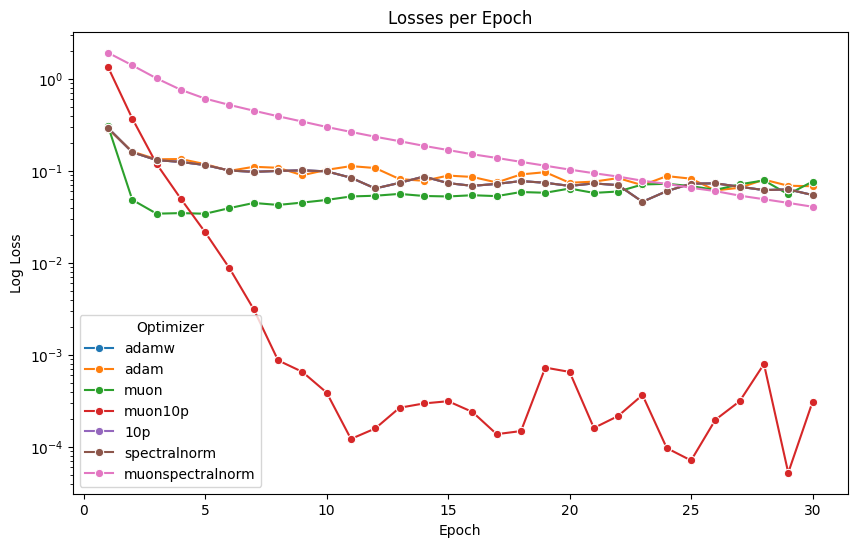

In [ ]:
def plot_losses(optimizers=OPTIMIZERS, save_dir="../figures/losses/"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    records = []
    for opt in optimizers:
        for epoch in range(1, 31):
            path = f"{RESULTS_DIR}{opt}/loss_landscape/particle0_epoch{epoch}_losses.pt"
            if not os.path.exists(path):
                print(f"File {path} does not exist")
                continue
            temp = torch.load(path, weights_only=False)
            records.append({
                "optimizer": opt,
                "epoch": epoch,
                "loss": temp["train_loss"],
            })
    df = pd.DataFrame(records)
    fig, axes = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=df, x="epoch", y="loss", hue="optimizer", marker="o", ax=axes)
    plt.yscale("log")
    plt.title("Losses per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.legend(title="Optimizer")
    plt.savefig(f"{save_dir}/losses.png")

plot_losses(optimizers=OPTIMIZERS)

## Swag Covariances

In [136]:
print(os.listdir(RESULTS_DIR + OPTIMIZERS[0] + "/swag_moments/"))

['particle2_epoch4_mom2.pt', 'particle6_epoch16_mom1.pt', 'particle3_epoch3_cov_mat_sqrt.pt', 'particle15_epoch5_cov_mat_sqrt.pt', 'particle4_epoch2_cov_mat_sqrt.pt', 'particle18_epoch2_mom2.pt', 'particle10_epoch12_cov_mat_sqrt.pt', 'particle12_epoch4_mom1.pt', 'particle19_epoch16_mom1.pt', 'particle13_epoch2_mom2.pt', 'particle9_epoch13_cov_mat_sqrt.pt', 'particle7_epoch14_cov_mat_sqrt.pt', 'particle17_epoch10_mom1.pt', 'particle19_epoch14_mom1.pt', 'particle8_epoch9_mom2.pt', 'particle6_epoch9_mom1.pt', 'particle0_epoch13_mom2.pt', 'particle4_epoch14_mom1.pt', 'particle6_epoch20_mom2.pt', 'particle4_epoch16_mom1.pt', 'particle9_epoch9_cov_mat_sqrt.pt', 'particle16_epoch13_mom2.pt', 'particle15_epoch11_mom1.pt', 'particle3_epoch3_mom2.pt', 'particle13_epoch7_mom1.pt', 'particle9_epoch5_mom1.pt', 'particle4_epoch8_cov_mat_sqrt.pt', 'particle9_epoch8_mom1.pt', 'particle11_epoch2_mom2.pt', 'particle12_epoch11_mom2.pt', 'particle9_epoch18_cov_mat_sqrt.pt', 'particle16_epoch14_mom1.pt', '

In [157]:
def plot_swag_covmats(optimizers, save_dir="../figures/swag_covmats/"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    records = []

    for opt in optimizers:
        for epoch in range(1, 21):
            for pid in range(1, 20):
                path = f"{RESULTS_DIR}{opt}/swag_moments/particle{pid}_epoch{epoch}_cov_mat_sqrt.pt"
                if not os.path.exists(path):
                    print(f"File {path} does not exist")
                    continue
                cov_blocks = torch.load(path, weights_only=False)
                total_trace = 0
                total_det = 1
                total_logdet = 0
                total_maxeig = 0
                total_mineig = None
                eigvals_all = []

                for block in cov_blocks:
                    if block.shape[0] == 0:
                        continue
                    cov = block @ block.T
                    eigvals = np.linalg.eigvalsh(cov.cpu().numpy())
                    eigvals_all.extend(eigvals)
                    total_trace += np.sum(eigvals)
                    # To avoid numerical issues, sum log(eigvals) for logdet
                    total_logdet += np.sum(np.log(np.clip(np.abs(eigvals), 1e-12, None)))
                    total_det *= np.prod(np.clip(eigvals, 1e-12, None))
                    total_maxeig = max(total_maxeig, np.max(eigvals))
                    block_mineig = np.min(eigvals)
                    if total_mineig is None or block_mineig < total_mineig:
                        total_mineig = block_mineig

                if eigvals_all:
                    eigvals_all = np.array(eigvals_all)
                    eigval_coef_var = np.std(eigvals_all) / np.mean(eigvals_all)
                    log_eigval_coef_var = np.log(eigval_coef_var)
                    log_maxeig = np.log(total_maxeig)
                    log_mineig = np.log(total_mineig)
                else:
                    eigval_coef_var = np.nan
                    total_mineig = np.nan
                    total_logdet = np.nan
                    total_maxeig = np.nan
                    total_trace = np.nan
                    total_det = np.nan

                records.append({
                    "optimizer": opt,
                    "epoch": epoch,
                    "particle": pid,
                    "trace": total_trace,
                    "det": total_det,
                    "logdet": total_logdet,
                    "maxeig": total_maxeig,
                    "mineig": total_mineig,
                    "eigval_coef_var": eigval_coef_var,
                    "log_eigval_coef_var": log_eigval_coef_var,
                    "log_maxeig": log_maxeig,
                    "log_mineig": log_mineig
                })

    df = pd.DataFrame(records)

    stats_to_plot = ["trace", "det", "logdet", "maxeig", "mineig", "eigval_coef_var"]
    for stat in stats_to_plot:
        plt.figure(figsize=(10, 6))
        for opt in df["optimizer"].unique():
            grouped = df[df["optimizer"] == opt].groupby("epoch")[stat]
            mean = grouped.mean()
            std = grouped.std()
            plt.plot(mean.index, mean.values, label=f"{opt}")
            plt.fill_between(mean.index, mean - std, mean + std, alpha=0.2)
        plt.xlabel("Epoch")
        plt.ylabel(stat.capitalize())
        if "log" in stat:
            plt.yscale("log")
        plt.title(f"SWAG Covariance {stat.capitalize()} Over Epochs")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{save_dir}/swag_covmat_{stat}_{'_'.join(optimizers)}.png")
        plt.close()
        
plot_swag_covmats(optimizers=["adam", "adamw", "muon"])
#plot_swag_covmats(optimizers=["adamw", "10p", "spectralnorm"])
#plot_swag_covmats(optimizers=["muon", "muon10p", "muonspectralnorm"])